In [1]:
from transformers import AutoTokenizer, BertForQuestionAnswering, BertModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/tanmaygoyal/opt/anaconda3/envs/pytorch_acc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [121]:
# Load model and retrieve attention weights

from bertviz import head_view, model_view
# from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, BertForQuestionAnswering, AutoModel

model_version = 'sentence-transformers/all-mpnet-base-v2'
model = AutoModel.from_pretrained(model_version, output_attentions=True, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(model_version)
question = "he is a good man"
text = "he is a good man"
inputs = tokenizer.encode_plus(question,text, return_tensors='pt')
input_ids = inputs['input_ids']
print(inputs.keys())
# token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list) 

dict_keys(['input_ids', 'attention_mask'])


In [ ]:
ticks = []
for i in range(len(inputs.input_ids[0])):
    print(inputs.input_ids[0][i], ':', tokenizer.decode(inputs.input_ids[0][i]))
    ticks.append(tokenizer.decode(inputs.input_ids[0][i]))

tensor(101) : [CLS]
tensor(2002) : he
tensor(2003) : is
tensor(1037) : a
tensor(2204) : good
tensor(2158) : man
tensor(102) : [SEP]
tensor(2002) : he
tensor(2003) : is
tensor(1037) : a
tensor(2204) : good
tensor(2158) : man
tensor(102) : [SEP]


In [ ]:
attention_tensors = []

for tensor in model(input_ids, token_type_ids=token_type_ids).attentions:
    attention_tensors.append(tensor.detach().numpy())

attentions_temp = torch.tensor(np.array(attention_tensors))
print(attentions_temp.shape)

torch.Size([6, 1, 12, 13, 13])


In [ ]:
a = attentions_temp
a[-2][0][0]

tensor([[0.9212, 0.0021, 0.0044, 0.0031, 0.0056, 0.0083, 0.0177, 0.0021, 0.0032,
         0.0035, 0.0054, 0.0066, 0.0169],
        [0.6013, 0.0702, 0.0637, 0.0089, 0.0075, 0.0287, 0.0204, 0.0805, 0.0478,
         0.0087, 0.0052, 0.0347, 0.0224],
        [0.2116, 0.0171, 0.2516, 0.0390, 0.0673, 0.0279, 0.0286, 0.0162, 0.1892,
         0.0488, 0.0425, 0.0270, 0.0331],
        [0.1017, 0.0343, 0.2357, 0.0717, 0.0601, 0.0321, 0.0467, 0.0395, 0.1722,
         0.0722, 0.0362, 0.0353, 0.0623],
        [0.5343, 0.0043, 0.0231, 0.0103, 0.0769, 0.0618, 0.0262, 0.0043, 0.0262,
         0.0246, 0.0920, 0.0759, 0.0402],
        [0.6869, 0.0110, 0.0126, 0.0036, 0.0165, 0.0931, 0.0174, 0.0088, 0.0101,
         0.0057, 0.0158, 0.0971, 0.0214],
        [0.0123, 0.0234, 0.4706, 0.0280, 0.0346, 0.0285, 0.1114, 0.0139, 0.1382,
         0.0109, 0.0103, 0.0132, 0.1047],
        [0.4497, 0.1049, 0.1020, 0.0160, 0.0112, 0.0348, 0.0313, 0.1009, 0.0572,
         0.0110, 0.0063, 0.0366, 0.0381],
        [0.2533,

In [ ]:
sentence1_len = len(question.split(" "))


<Axes: >

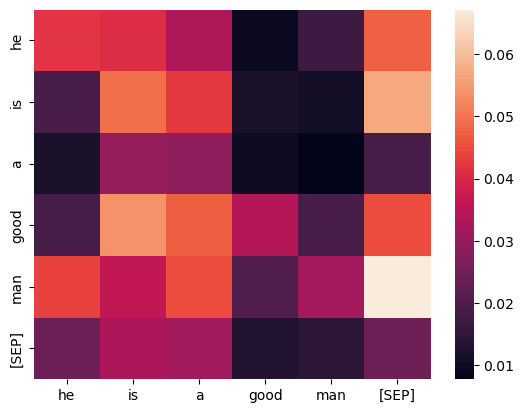

In [ ]:
sns.heatmap(attentions_temp.mean(axis=2)[-2][0].T[1:sentence1_len+2,sentence1_len+2:] ,xticklabels = ticks[sentence1_len+2:] , yticklabels = ticks[1:sentence1_len+2])

In [ ]:
attentions_temp.mean(axis=2)[-2][0].T[1:sentence1_len+2,sentence1_len+2:]

tensor([[0.0421, 0.0409, 0.0336, 0.0095, 0.0172, 0.0474],
        [0.0193, 0.0492, 0.0426, 0.0117, 0.0106, 0.0570],
        [0.0120, 0.0302, 0.0290, 0.0100, 0.0077, 0.0190],
        [0.0188, 0.0537, 0.0471, 0.0344, 0.0193, 0.0451],
        [0.0439, 0.0358, 0.0449, 0.0202, 0.0317, 0.0672],
        [0.0240, 0.0332, 0.0316, 0.0130, 0.0147, 0.0244]])

In [ ]:
tokenizer(question, text, return_tensors='pt')

{'input_ids': tensor([[ 101, 2002, 2003, 1037, 2204, 2158,  102, 2002, 2003, 1037, 2204, 2158,
          102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:

 import numpy as np
 import torch
 from transformers import AutoTokenizer, AutoModel
 
 
 def get_word_idx(sent: str, word: str):
    return sent.split(" ").index(word)
 
 
 def get_hidden_states(encoded, token_ids_word, model, layers):
     """Push input IDs through model. Stack and sum `layers` (last four by default).
        Select only those subword token outputs that belong to our word of interest
        and average them."""
     with torch.no_grad():
         output = model(**encoded)
 
     # Get all hidden states
     states = output.hidden_states
     # Stack and sum all requested layers
     output = torch.stack([states[i] for i in layers]).sum(0).squeeze()
     # Only select the tokens that constitute the requested word
     word_tokens_output = output[token_ids_word]
 
     return word_tokens_output.mean(dim=0)
 
 
 def get_word_vector(sent, idx, tokenizer, model, layers):
     """Get a word vector by first tokenizing the input sentence, getting all token idxs
        that make up the word of interest, and then `get_hidden_states`."""
     encoded = tokenizer.encode_plus(sent, return_tensors="pt")
     # get all token idxs that belong to the word of interest
     token_ids_word = np.where(np.array(encoded.word_ids()) == idx)
 
     return get_hidden_states(encoded, token_ids_word, model, layers)
 
 
 def main(layers , sent1 , sent2):
    # Use last four layers by default
    layers = [-4, -3, -2, -1] if layers is None else layers
    tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
    model = AutoModel.from_pretrained("bert-base-cased", output_hidden_states=True)

    sent1_embeddings = []
    sent2_embeddings = []
    sent1 = sent1
    sent2 = sent2
    for w in sent1.split(" "):
        sent1_embeddings.append(get_word_vector(sent1, get_word_idx(sent1, w), tokenizer, model, layers))
    for w in sent2.split(" "):
        sent2_embeddings.append(get_word_vector(sent2 , get_word_idx(sent2, w), tokenizer, model, layers))
    # idx = get_word_idx(sent, "cookies")

    # word_embedding = get_word_vector(sent, idx, tokenizer, model, layers)
     
    return sent1_embeddings, sent2_embeddings 


In [ ]:
sent1 = question
sent2 = text
s1 , s2 = main(None , sent1 , sent2)
sentence1 = sent1.split(" ")
sentence2 = sent2.split(" ")
for idx1 , v1 in enumerate(s1):
    for idx2 , v2 in enumerate(s2):
        print(sentence1[idx1] , sentence2[idx2] , torch.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0)))

he he tensor([1.0000])
he is tensor([0.7903])
he a tensor([0.7180])
he good tensor([0.6882])
he man tensor([0.7637])
is he tensor([0.7903])
is is tensor([1.0000])
is a tensor([0.8656])
is good tensor([0.7868])
is man tensor([0.7871])
a he tensor([0.7180])
a is tensor([0.8656])
a a tensor([1.])
a good tensor([0.8002])
a man tensor([0.7467])
good he tensor([0.6882])
good is tensor([0.7868])
good a tensor([0.8002])
good good tensor([1.0000])
good man tensor([0.7622])
man he tensor([0.7637])
man is tensor([0.7871])
man a tensor([0.7467])
man good tensor([0.7622])
man man tensor([1.0000])


In [ ]:
attention_second_last = attentions_temp.mean(axis=2)[-2][0].T[1:sentence1_len+2,sentence1_len+2:] 
sum = 0
for r in range(attention_second_last.shape[0]-1):
    max_idx = np.argmax(attention_second_last[r])
    print(r , sentence1[r] , max_idx)
    if max_idx == len(attention_second_last[r])-1:
        continue
    print(sentence1[r] , sentence2[max_idx] , torch.cosine_similarity(s1[r].unsqueeze(0), s2[max_idx].unsqueeze(0)))
    sum+=torch.cosine_similarity(s1[r].unsqueeze(0), s2[max_idx].unsqueeze(0))


print(sum)
print(sum/len(question.split(" ")))

0 he tensor(5)
1 is tensor(5)
2 a tensor(1)
a is tensor([0.8656])
3 good tensor(1)
good is tensor([0.7868])
4 man tensor(5)
tensor([1.6524])
tensor([0.3305])
